In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import sensitivity as sns

# Our Mission

In [2]:
def integrand(x, a, b):
    return a*(x**(-b))

In [3]:
def plot_agn(lower_l, higher_l, a, b):
    energies = np.arange(lower_l, 501, 10)
    _photons = np.array([quad(integrand, l, h, args=(a,b)) for l, h in zip(np.arange(lower_l, 500, 10), np.arange(higher_l, 500, 10))])
    photons = [_photon[0] for _photon in _photons]
    error = [_photon[1] for _photon in _photons]
    return energies, photons, error

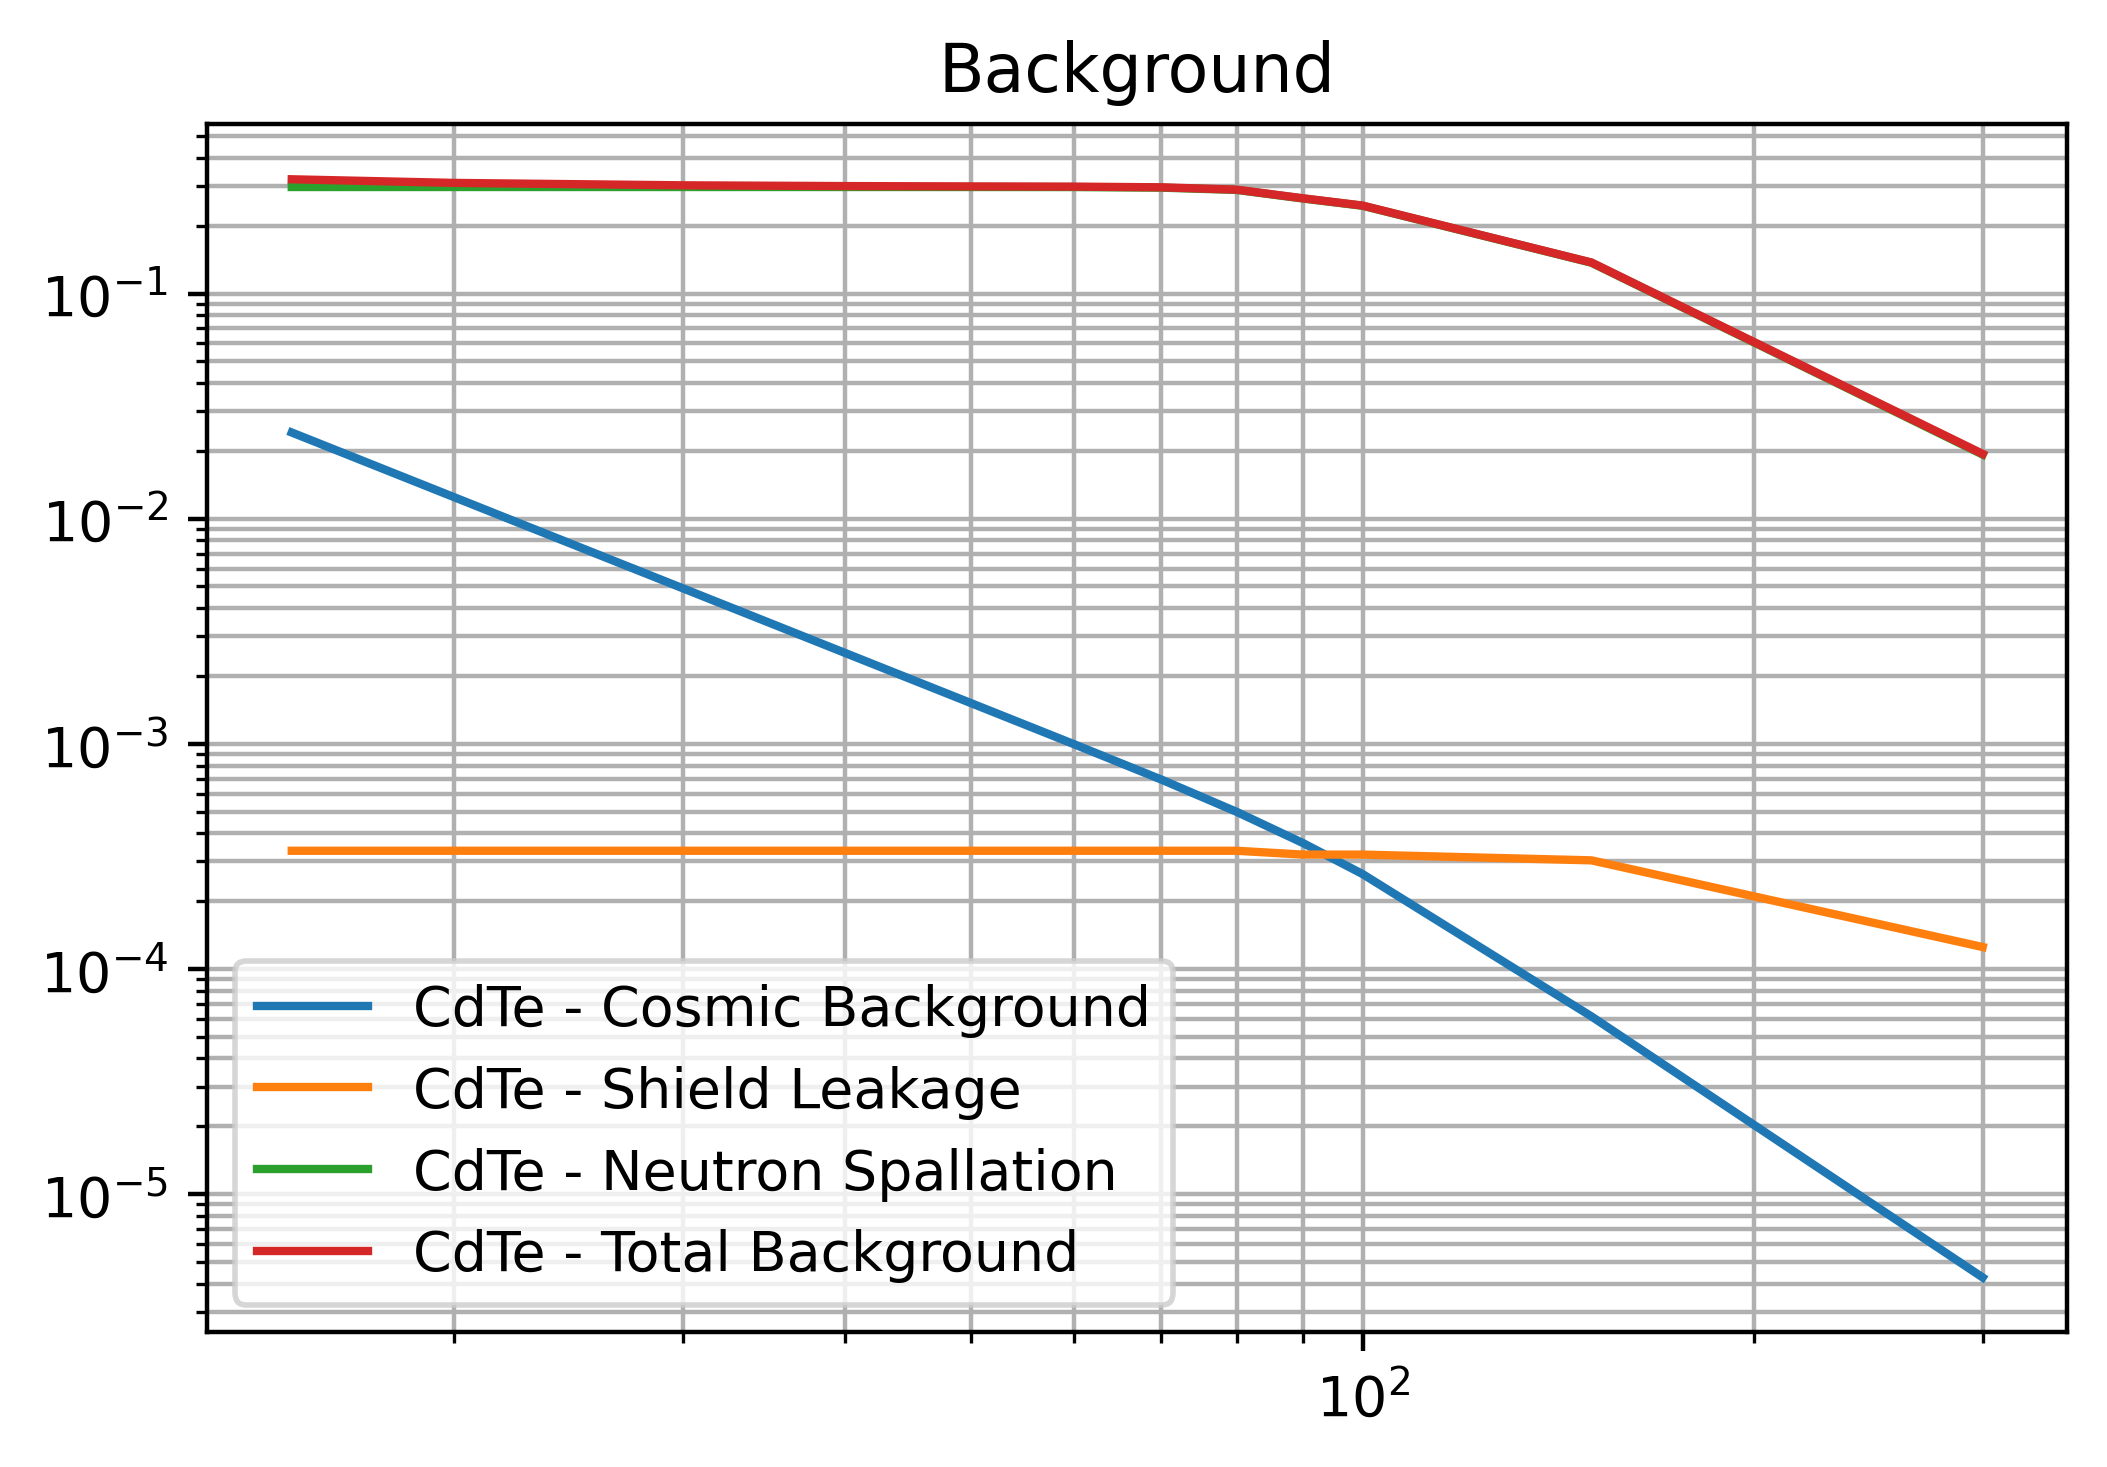

In [4]:
cdte_bg_curves = pd.read_csv('cdtebg.csv')
csi_bg_curves = pd.read_csv('csibg.csv')
cdte_energies = cdte_bg_curves['energy'].values # keV
csi_energies = csi_bg_curves['energy'].values # keV
cdte_mass_attentuation_coefficients = cdte_bg_curves['massatt'].values
csi_mass_attentuation_coefficients = csi_bg_curves['massatt'].values
cdte_background_values = {
    'density' : 5.85, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : cdte_mass_attentuation_coefficients, 
    'energies' : cdte_energies, # keV
    'solid_angle' : 0.14, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(cdte_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : cdte_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 3466.88, # cm^2
    'material': 'CdTe',
}
csi_background_values = {
    'density' : 4.51, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : csi_mass_attentuation_coefficients, 
    'energies' : csi_energies, # keV
    'solid_angle' : 0.14, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(csi_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : csi_bg_curves['fig5'].values,
    'thickness': 3, # cm
    'area': 3466.88, # cm^2
    'material': 'CsI',
}

cdte_bg_noise = sns.Background(**cdte_background_values)
cdte_background = cdte_bg_noise.calculate_bg()
fig, ax = plt.subplots(dpi=400)
cdte_bg_noise.ploty(ax)

csi_bg_noise = sns.Background(**csi_background_values)
csi_background = csi_bg_noise.calculate_bg()

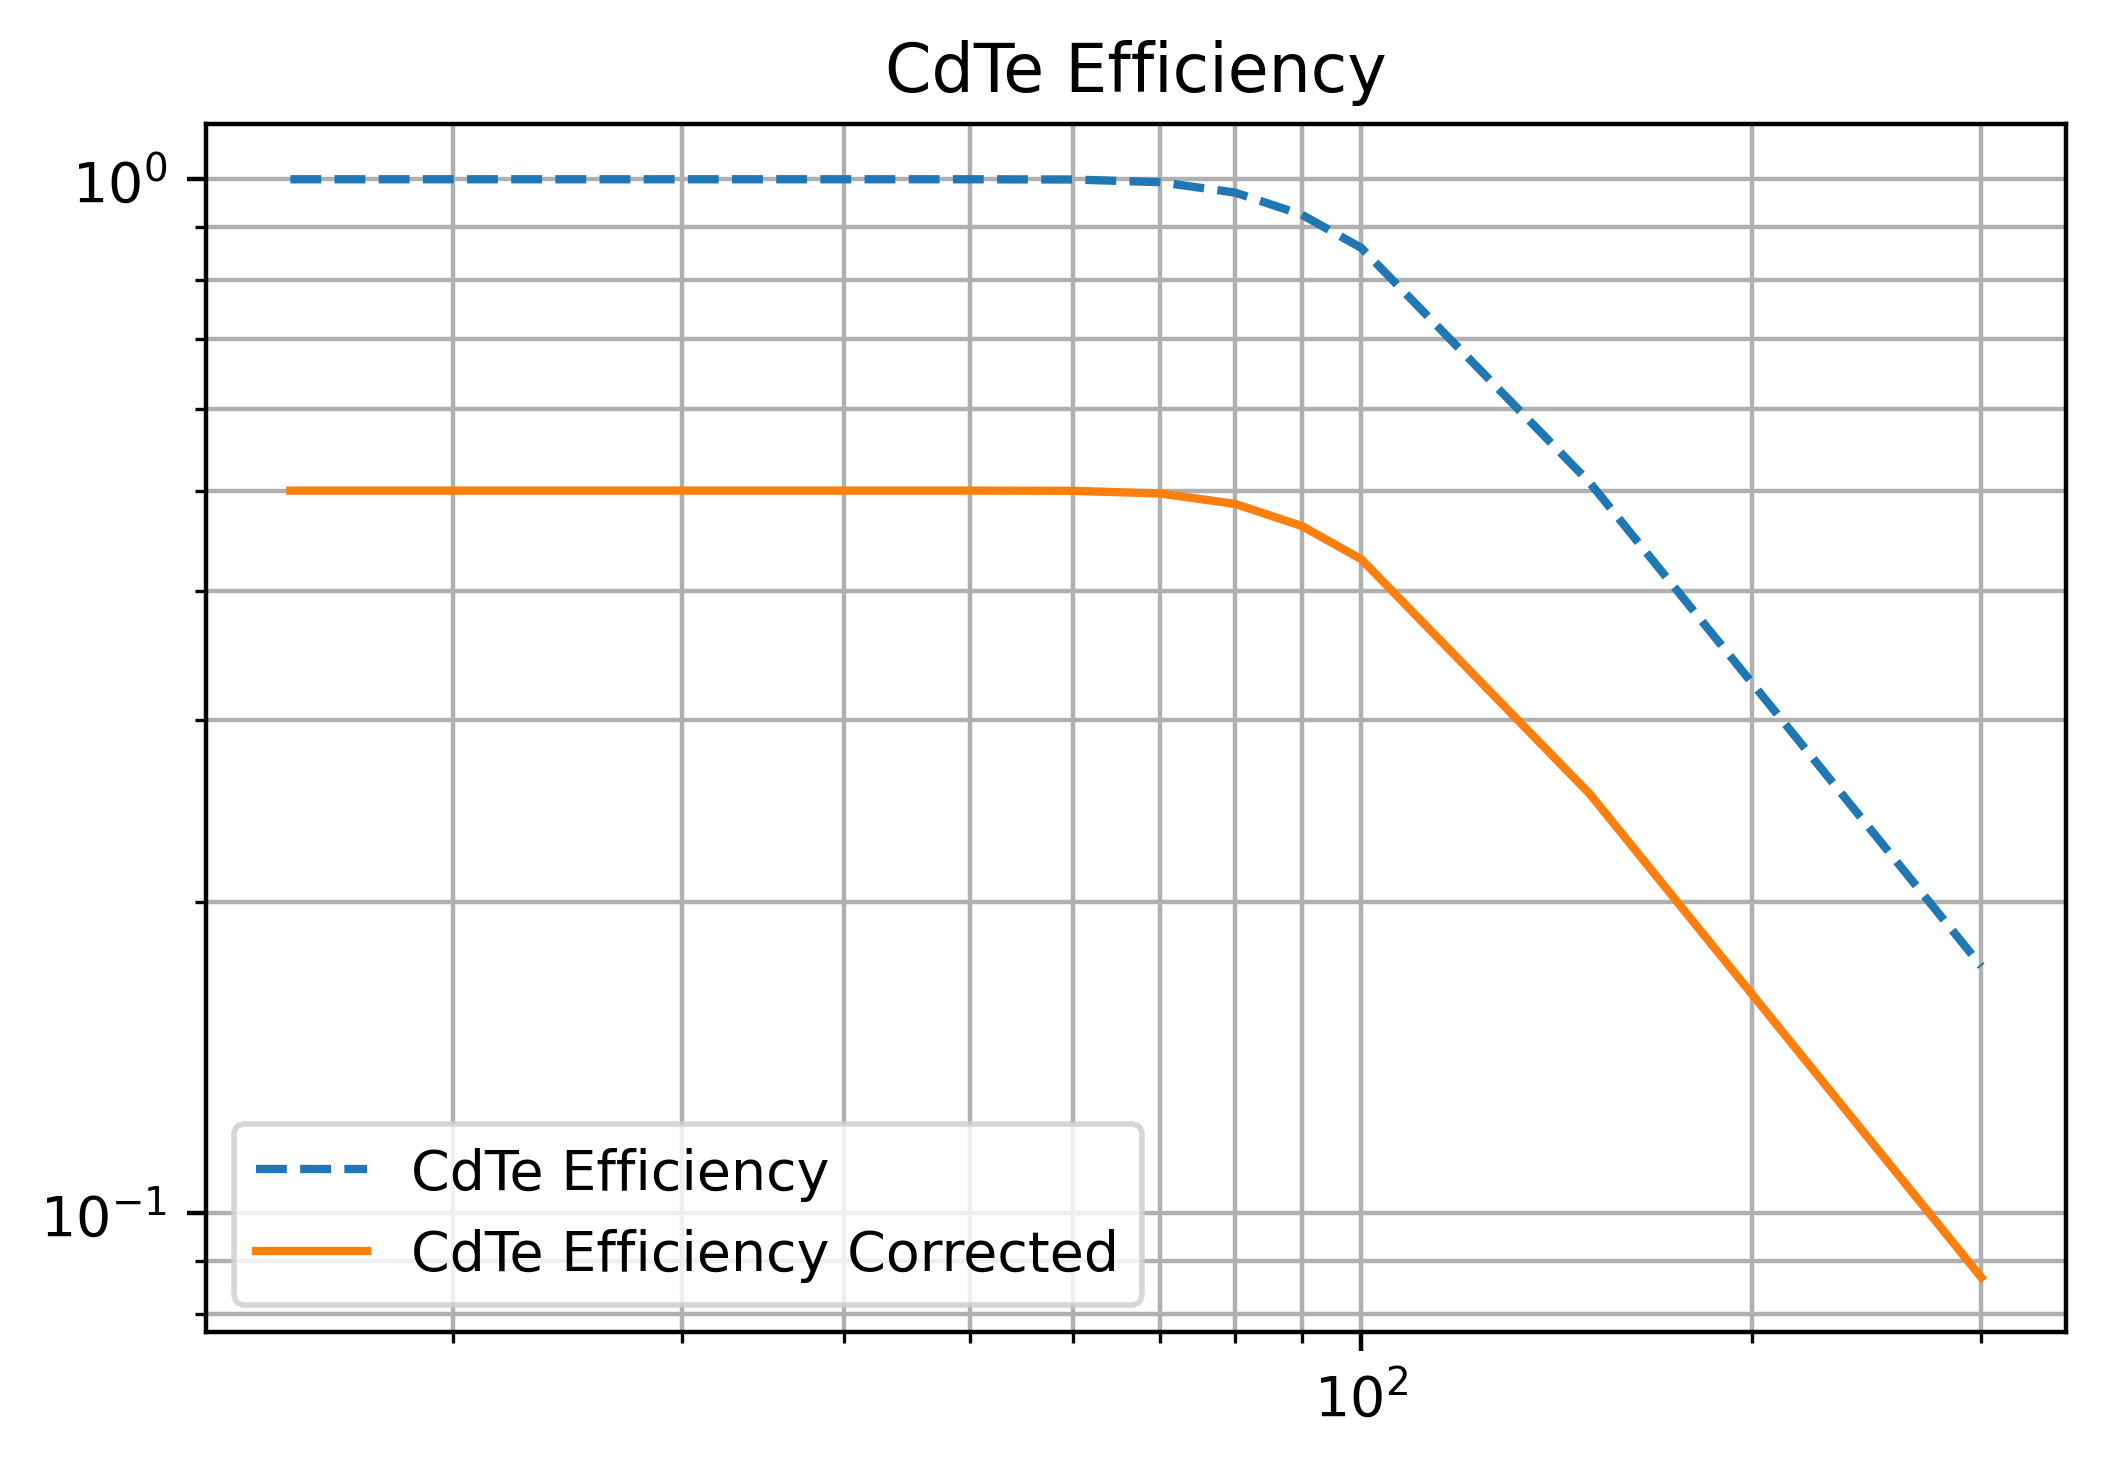

In [19]:
fig3, ax3 = plt.subplots(dpi=400)
ax3.plot(cdte_bg_noise.energies, cdte_bg_noise.efficiencies)
w_ddd = pd.read_csv('w.csv')
ax3.plot(w_ddd['Photon']*1e3, w_ddd['Coherent'], label='tungsten')
ax3.legend()

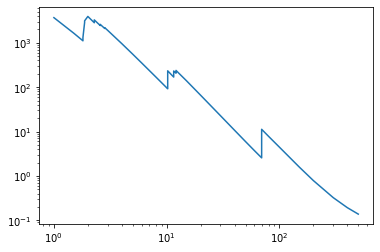

In [21]:
plt.plot(w_ddd['Photon']*1e3, w_ddd['Coherent'])
plt.xscale('log')
plt.yscale('log')

In [5]:
cdte_sensitivity_values = {
    'background_noise' : cdte_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : cdte_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CdTe',
    'solidangle': 1.4,
}
cdte_sensitivity = sns.Sensitivity(**cdte_sensitivity_values)
cdte_sensitivities = cdte_sensitivity.calculate_sensitivity()

csi_sensitivity_values = {
    'background_noise' : csi_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : csi_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CsI',
    'solidangle': 1.4,
}
csi_sensitivity = sns.Sensitivity(**csi_sensitivity_values)
csi_sensitivities = csi_sensitivity.calculate_sensitivity()

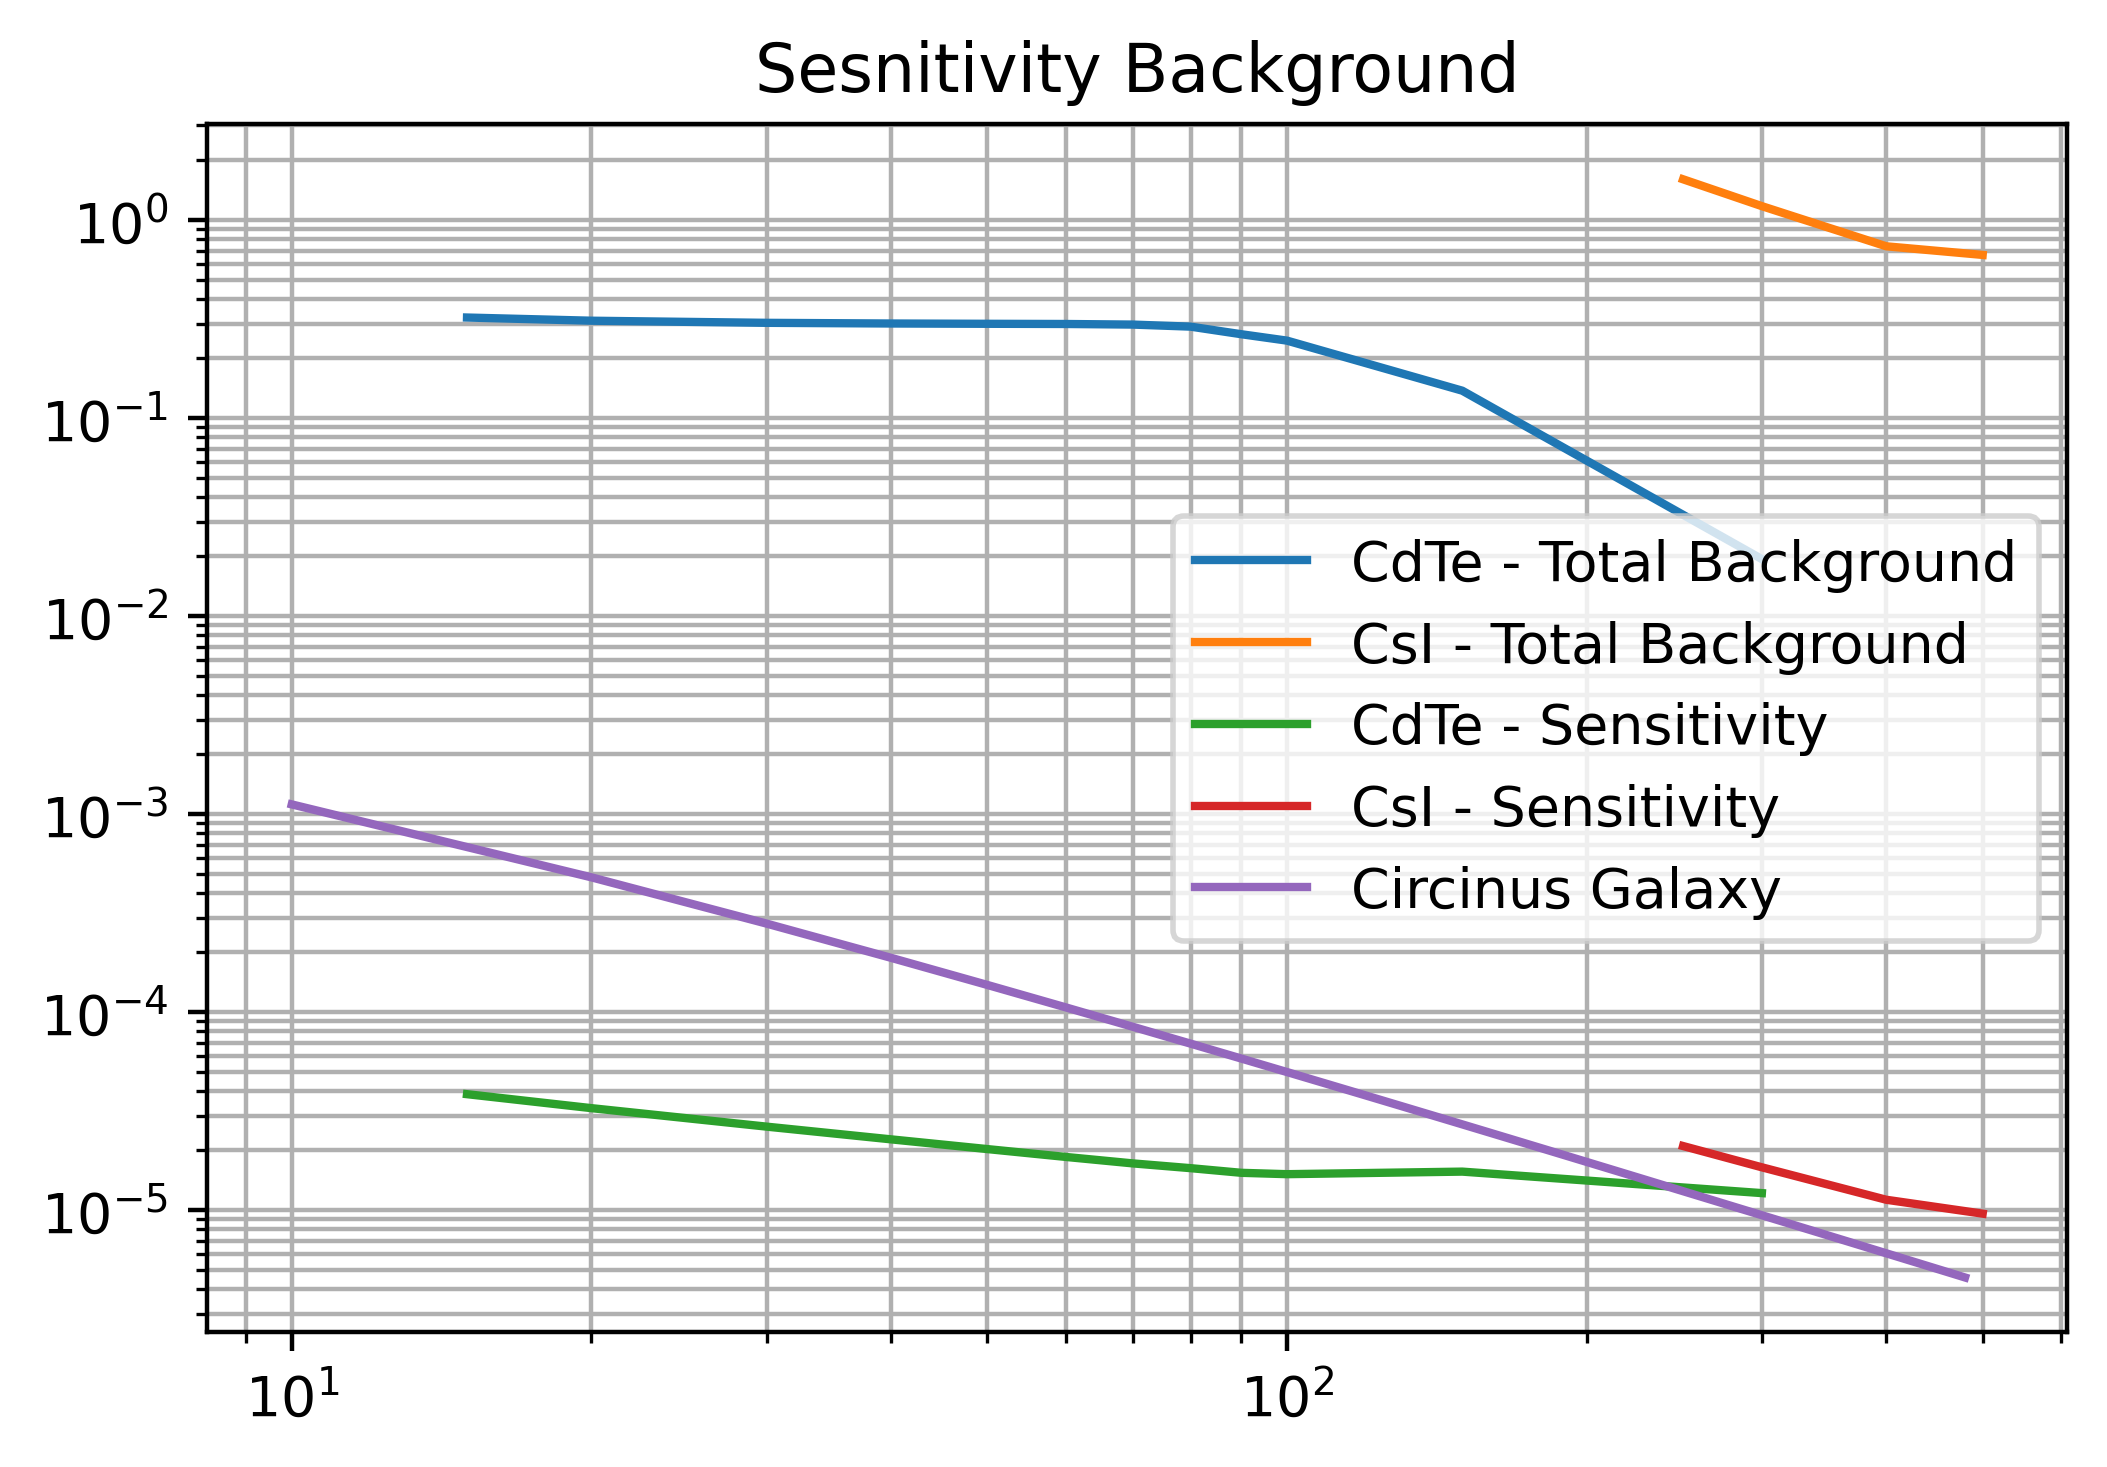

In [6]:
fig2, ax2 = plt.subplots(dpi=400)
ax2.grid(which='both')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(cdte_bg_noise.energies, cdte_bg_noise.total_bg, label='CdTe - Total Background')
ax2.plot(csi_bg_noise.energies, csi_bg_noise.total_bg, label='CsI - Total Background')
ax2.plot(cdte_sensitivity.energies, cdte_sensitivity.sensitivities, label='CdTe - Sensitivity')
ax2.plot(csi_sensitivity.energies, csi_sensitivity.sensitivities, label='CsI - Sensitivity')
ax2.set_title('Sesnitivity Background')

lower_l = 10
higher_l = 20
a = 7.07e-3 # constant
b = 1.56 # spectral index

energies, photons, error = plot_agn(lower_l, higher_l, a, b)

ax2.plot(energies[:-2], photons, label='Circinus Galaxy')
ax2.legend()


# Swift Bat 

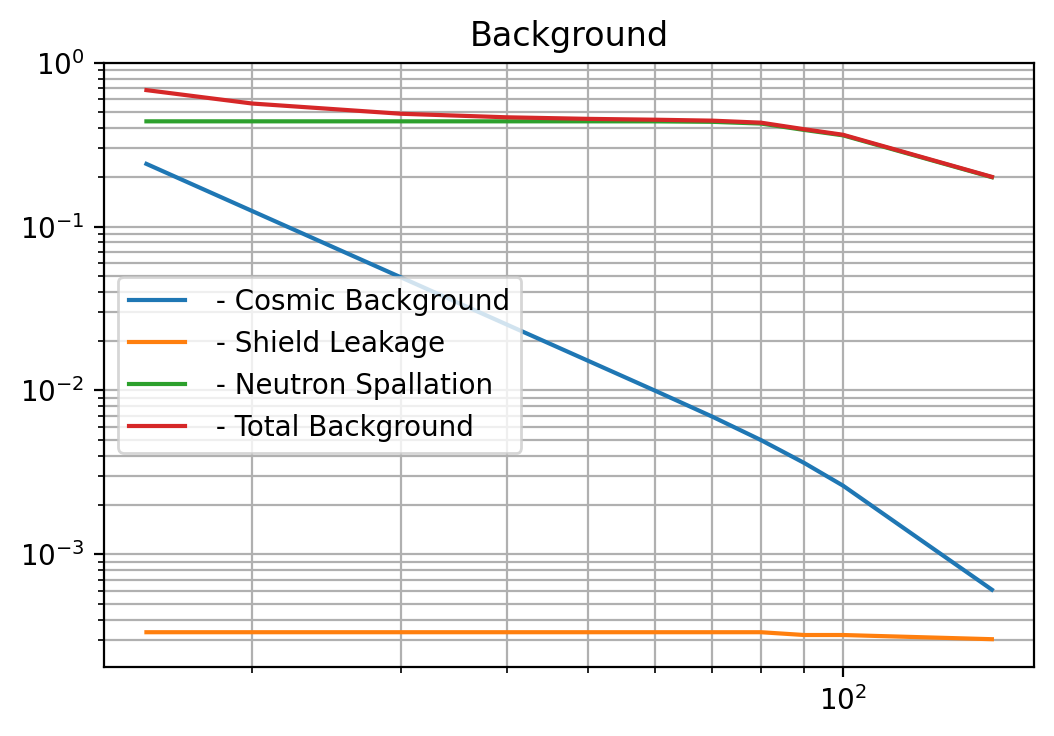

<AxesSubplot:title={'center':'Background'}>

In [7]:
bat_bg_curves = pd.read_csv('batbgcurves.csv')
bat_energies = bat_bg_curves['energy'].values # keV
bat_mass_attentuation_coefficients = bat_bg_curves['massatt'].values
bat_background_values = {
    'density' : 5.76, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : bat_mass_attentuation_coefficients, 
    'energies' : bat_energies, # keV
    'solid_angle' : 1.4, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(bat_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : bat_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 5200, # cm^2
    'material': '',
}
bat_bg_noise = sns.Background(**bat_background_values)
bat_background = bat_bg_noise.calculate_bg()
batfig, batax = plt.subplots(dpi=200)
bat_bg_noise.ploty(batax)


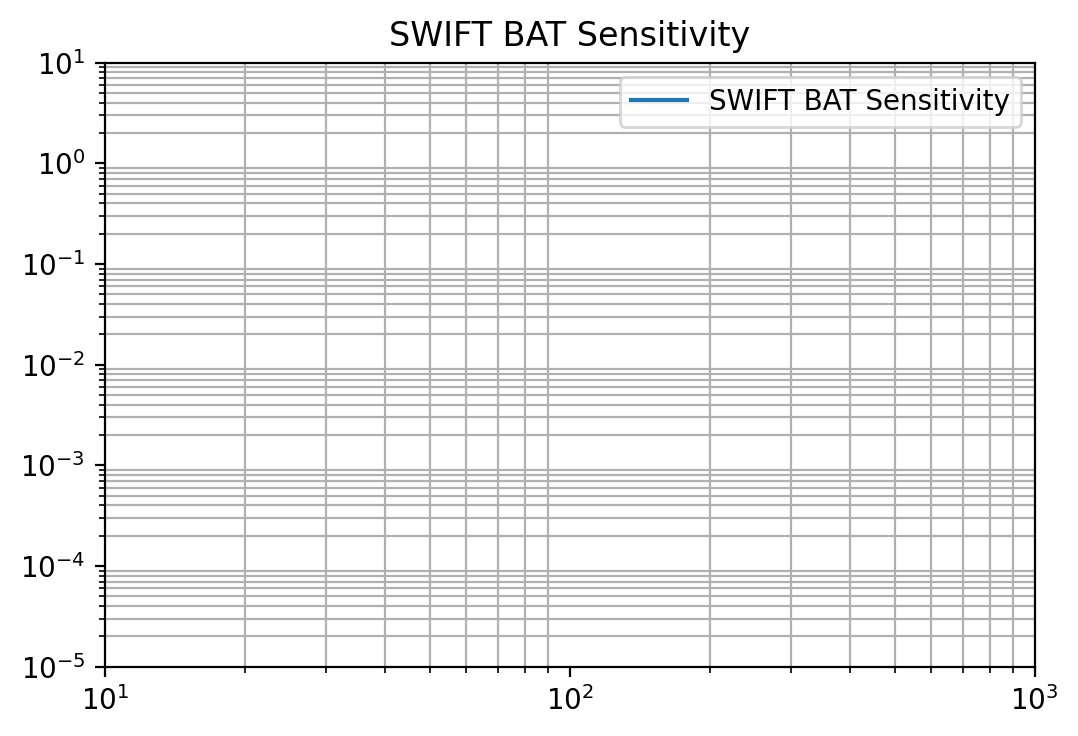

In [8]:
bat_sensitivity_values = {
    'background_noise' : bat_background,
    'detector_efficiency' : bat_bg_noise.efficiencies,
    'energies' : bat_energies, # keV
    'area' : 5200, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': '',
    'solidangle': 1.4,
}
bat_sensitivity = sns.Sensitivity(**bat_sensitivity_values)
bat_sensitivities = bat_sensitivity.calculate_sensitivity()
batfig, batax = plt.subplots(dpi=200)
batax = bat_sensitivity.ploty(batax, show_plot=False)
batax.set_xlim(10, 1e3)
batax.set_ylim(1e-5, 10)
batax.set_title('SWIFT BAT Sensitivity')
batax.legend(['SWIFT BAT Sensitivity'])
plt.show()
